In [61]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
# For operating files in the system
import os 

# The paths to the Nifti files 
path = r"C:\Users\USER\Desktop\Brainhack\Brainhack_final\p004_output\output\cpac_cpac-default-pipeline\sub-004_ses-1\func"

# This file containing preprocessing rs-fMRI data export from C-PAC
# (naming convention ket word:"_space-template_desc-preproc-bold")
fmri_filepath = os.path.join(path, "sub-004_ses-1_task-rest_run-001_space-template_desc-preproc-1_bold.nii.gz")

In [2]:
# Used to read and write neuroimage files
import nibabel as nib

# Check the structure
fmri_img = nib.load(fmri_filepath)
print(fmri_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (61, 73, 61, 180)
affine:
[[  -3.    0.    0.   90.]
 [   0.    3.    0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  61  73  61 180   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  2.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code

In [22]:
# To get the data array 
fmri_data = fmri_img.get_fdata()
fmri_data.shape

(61, 73, 61, 180)

In [62]:
# This file containing the masker for atlas from C-PAC
# (naming convention ket word:"_space-template_desc-bold_mask")
mask_filepath = os.path.join(path, "sub-004_ses-1_task-rest_run-001_space-template_desc-bold_mask.nii.gz")

# Use NiftiMasker to generate a two-dimensional data matrix
from nilearn.input_data import NiftiMasker
mask_img = nib.load(mask_filepath)
masker = NiftiMasker(mask_img=mask_img)
masked_data = masker.fit_transform(fmri_filepath)
masked_data.shape

(180, 62401)

Text(0.5, 1.0, 'Masked Brain Image')

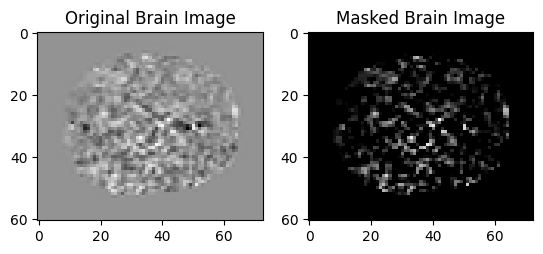

In [65]:
# For creating image graphics
import matplotlib.pyplot as plt

# Create a 2x1 subplot layout, placing the two images in different subplots
fig, axes = plt.subplots(1,2)

# Set the slice position
slice_index_1 = 30
slice_index_2 = 70

# Plot a slice of our origin brain for a time point as an image
axes[0].imshow(fmri_data[:,:,slice_index_1,slice_index_2], cmap='gray')
axes[0].set_title('Original Brain Image')

# Threshold the data after masked, and convert the thresholded data back to the original image space
thresholded_masked_data = masked_data * (masked_data > masked_data.mean())
thresholded_img = masker.inverse_transform(thresholded_masked_data)

# Plot a brain image after masked
axes[1].imshow(thresholded_img.get_fdata()[:,:,slice_index_1,slice_index_2], cmap='gray')
axes[1].set_title('Masked Brain Image')